In [1]:
import pandas as pd
df = pd.read_csv("WELFake_Dataset.csv")
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [7]:
df.drop(columns='Unnamed: 0', axis = 1, inplace=True)
df.rename(columns={'label':'labels'},inplace=True)
df.head()

,title,text,labels
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [9]:
df.shape

(72134, 3)

## Data Preprocessing

#### Checking for Null 

In [11]:
df.isna().sum()

title     558
text       39
labels      0
dtype: int64

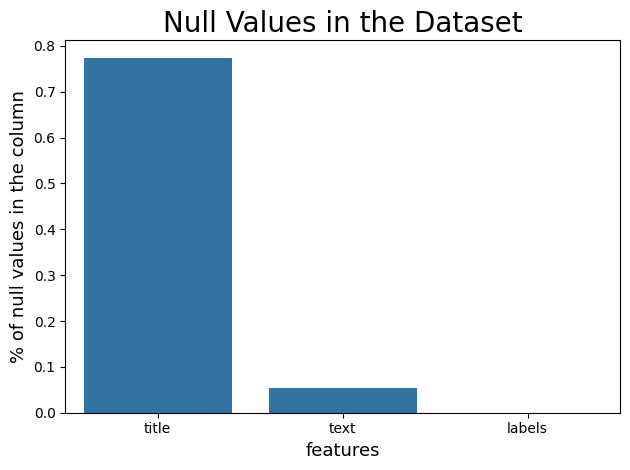

In [12]:
import seaborn as sns
from matplotlib import pyplot as plt
def plot_nulls(data,title,x_axis_label,y_axis_label):

    # Number of nulls for each column
    data_nulls = (data.apply(lambda x:x.isnull().value_counts()).T[True]/len(data)*100).reset_index(name='count')
    
    sns.barplot(data_nulls,x="index",y="count")
    plt.title(title,fontsize=20)
    plt.xlabel(x_axis_label,fontsize=13)
    plt.ylabel(y_axis_label,fontsize=13)

    plt.tight_layout()
    plt.show()

plot_nulls(df,"Null Values in the Dataset",'features','% of null values in the column')  

In [13]:
# Dropping the null values as they are less than 1% of the total entries
df.dropna(axis=0,inplace=True)

In [14]:
# Checking for duplicate values
df.duplicated().sum()

np.int64(8416)

In [15]:
# more than 8000 duplicate rows. Drop them
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(63121, 3)

##### Insights
- After dropping the null and duplicates the size decreases from 72134 to 63121 (almost 9K)

In [18]:
# Shiffling the data frame 
data = df.sample(frac=1,random_state=42) 

### EDA

#### Checking whether the target is balanced or imbalanced

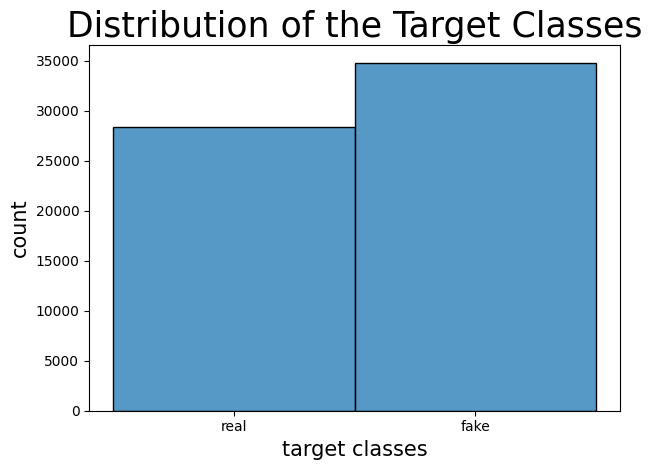

In [19]:
# Creating a column with 'readable' labels for the news
news_map = {1:'real',0:'fake'}
df['label_names'] = df['labels'].map(news_map)

sns.histplot(data=df.label_names)
plt.title('Distribution of the Target Classes',fontsize=25)
plt.xlabel('target classes',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.tight_layout()

##### Insights:
- Slightly imbalanced but works fine

#### Number of Tokens in the Title and the Text Columns

(0.0, 3000.0)

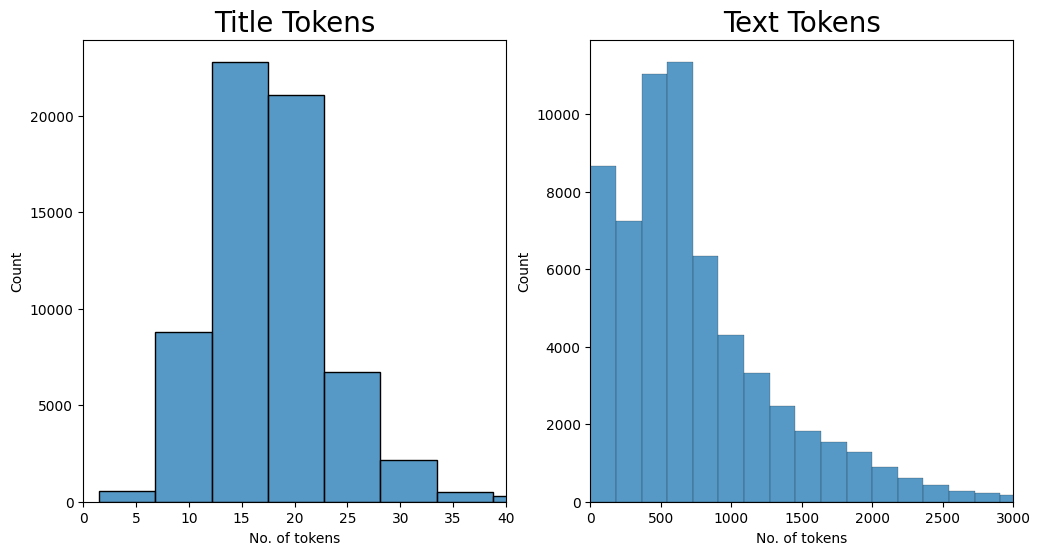

In [20]:
####################################
# In general one has 1.5 tokens per word on average
title_tokens = df['title'].apply(lambda x: len(x.split())*1.5)
text_tokens  = df['text'].apply(lambda x: len(x.split())*1.5)
####################################

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,6))

ax1 = sns.histplot(title_tokens,ax=ax1,bins=20)
ax1.set_xlabel('No. of tokens')
ax1.set_title("Title Tokens",fontsize=20)
ax1.set_xlim(0,40)

ax2 = sns.histplot(text_tokens,ax=ax2,bins=200)
ax2.set_xlabel('No. of tokens')
ax2.set_title("Text Tokens",fontsize=20)
ax2.set_xlim(0,3000)

##### Insights: 
The first one "Title Token" has much less tokens. Because of this, it is easier to be dealt with and for that perform the fake news detection on the title column

#### Average Number of Words in the Real/Fake News Titles

C:\Users\Amreet\AppData\Local\Temp\ipykernel_44324\3180566999.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.barplot(data=avg_title,x='label_names',y='avg title length',palette='bright')


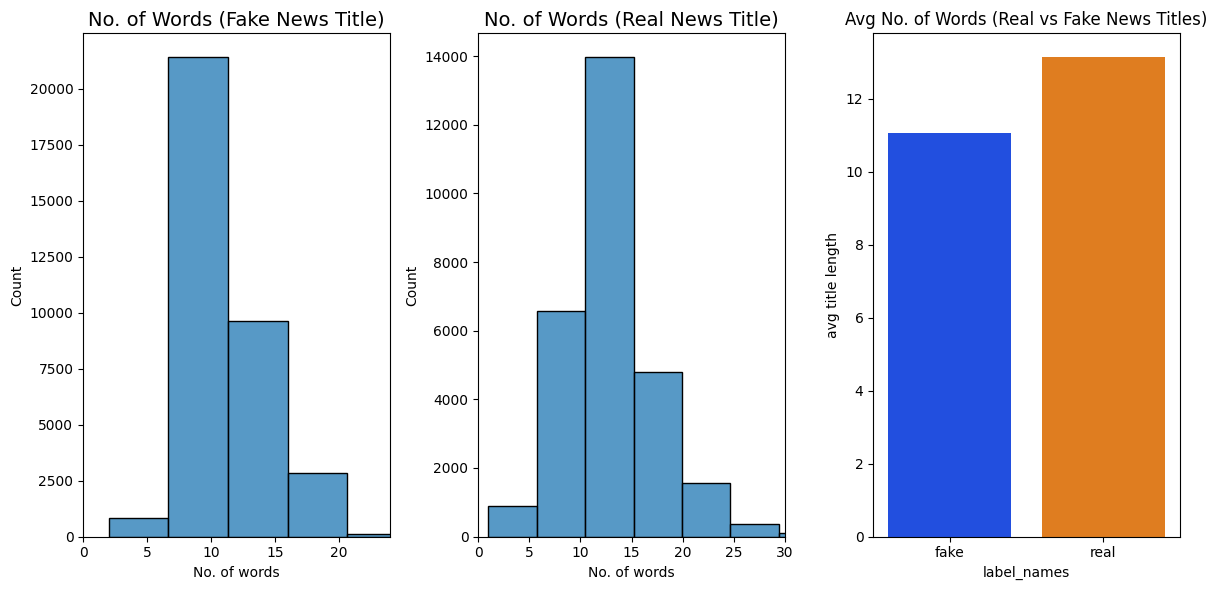

In [22]:
##########################
fake_title = df.loc[data.labels == 0]['title'].apply(lambda x: len(x.split()))
real_title = df.loc[data.labels == 1]['title'].apply(lambda x: len(x.split()))

df['title_length'] = data['title'].apply(lambda x: len(x.split()))

avg_title = df.groupby('label_names')['title_length'].mean().reset_index(name='avg title length')
##########################

fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(12,6))

ax1 = sns.histplot(fake_title,ax=ax1,bins=6)
ax1.set_xlim(0,24)
ax1.set_xlabel('No. of words')
ax1.set_title("No. of Words (Fake News Title)",fontsize=14)

ax2 = sns.histplot(real_title,ax=ax2,bins=15)
ax2.set_xlim(0,30)
ax2.set_xlabel('No. of words')
ax2.set_title("No. of Words (Real News Title)",fontsize=14)

ax3 = sns.barplot(data=avg_title,x='label_names',y='avg title length',palette='bright')
ax3.set_title("Avg No. of Words (Real vs Fake News Titles)",fontsize=12)

plt.tight_layout()

#### Most Frequent Words in the Real/Fake News Titles

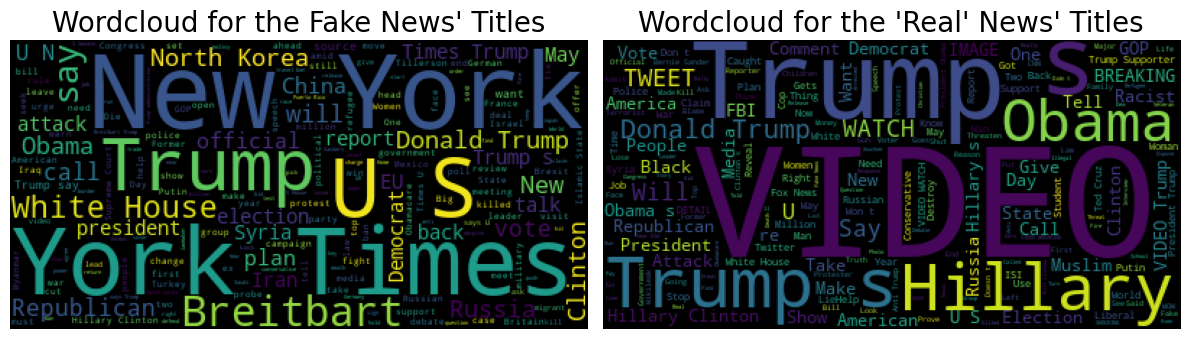

In [23]:
from wordcloud import WordCloud
text_fake = ' '.join(data.loc[data.labels == 0]['title'])
text_real = ' '.join(data.loc[data.labels == 1]['title'])

wordcloud_fake = WordCloud().generate(text_fake)
wordcloud_real = WordCloud().generate(text_real)

fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,6))

ax1.imshow(wordcloud_fake)
ax1.axis("off")
ax1.set_title("Wordcloud for the Fake News' Titles",fontsize=20)

ax2.imshow(wordcloud_real)
ax2.axis("off")
ax2.set_title("Wordcloud for the 'Real' News' Titles",fontsize=20)

plt.tight_layout()
plt.show()

In [24]:

import re
import string
df2 = df.copy()

def clean_text(text):

    text = text.lower()
    text = text.replace('\n', ' ')
    text = re.sub(r'\d+', ' ', text)
    text = text.translate(str.maketrans(' ', ' ', string.punctuation))
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    return text
    
df2['title'] = df2['title'].apply(clean_text)

In [25]:
df2.head()

,title,text,labels,label_names,title_length
0,law enforcement on high alert following threat...,No comment is expected from Barack Obama Membe...,1,real,18
2,unbelievable obama’s attorney general says mos...,"Now, most of the demonstrators gathered last ...",1,real,18
3,bobby jindal raised hindu uses story of christ...,A dozen politically active pastors came here f...,0,fake,16
4,satan russia unvelis an image of its terrifyin...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,real,16
5,about time christian group sues amazon and spl...,All we can say on this one is it s about time ...,1,real,13


In [26]:
df2.drop(columns=['title_length'],axis=1,inplace=True)
df2.to_csv('Clean_Dataset.csv', index=False) 